In [1]:
# Importing the necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing warnigs

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [3]:
# Reading the csv file

df_leads = pd.read_csv('Leads.csv') 
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Check shape of the DF
df_leads.shape

(9240, 37)

In [5]:
#Check statistical data of numerical columns in DF
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [6]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Check the different levels of all columns
# Get the value counts of all the columns

for column in df_leads:
    print(df_leads[column].value_counts())
    print('-------------------------------------------')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
-------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
-------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------

- Going through the data, we can see there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. 
- These values are as good as missing values and hence we can replace these with NaN.

In [8]:
# replace 'Select' with NaN
df_leads.replace('Select',np.NaN, inplace=True)

In [9]:
# Checkk the count of null values
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Check the percentage of missing values in each column

round((df_leads.isnull().sum()/len(df_leads))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Drop the columns with missing value percentage more than 40%
null_col = ['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','How did you hear about X Education']
df_leads.drop(null_col,axis=1,inplace=True)

In [12]:
# Check the percentage of missing values after dropping columns with high missing values
round((df_leads.isnull().sum()/len(df_leads))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

- Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. 
- These include Do Not Email, Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. 
- Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [13]:
# Dropping these highly skewed columns as the won't be useful for analysis

df_leads.drop(['Do Not Email','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'],axis=1,inplace=True)

Also, the variable 'What matters most to you in choosing a course' has the level 'Better Career Prospects' 6528 times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [14]:
df_leads.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [15]:
# Checking the null value percentage after dropping unusefull columns
round((df_leads.isnull().sum()/len(df_leads))*100,2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            36.58
What is your current occupation           29.11
Tags                                      36.29
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [16]:
# Imputing the missing values in Lead Source with suitable statistical method
df_leads['Lead Source'].fillna(df_leads['Lead Source'].mode()[0],inplace=True)
df_leads['Lead Source'].isnull().sum()

0

In [17]:
# Imputing the missing values in Lead Source with suitable statistical method
df_leads['TotalVisits'].fillna(round(df_leads['TotalVisits'].median(),2),inplace=True)
df_leads['TotalVisits'].isnull().sum()

0

There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

In [18]:
df_leads['Country'].fillna('Not provided',inplace=True)
df_leads['Specialization'].fillna('Not provided',inplace=True)
df_leads['What is your current occupation'].fillna('Not provided',inplace=True)
df_leads['City'].fillna('Not provided',inplace=True)
df_leads['Tags'].fillna('Not provided',inplace=True)

In [19]:
# Checking the null value percentage after dropping unusefull columns
round((df_leads.isnull().sum()/len(df_leads))*100,2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [20]:
# Dropping the rows with missing values in Page Views Per Visit
df_leads = df_leads[~pd.isnull(df_leads['Page Views Per Visit'])]

In [21]:
# Checking the null value percentage after dropping unusefull columns
round((df_leads.isnull().sum()/len(df_leads))*100,2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [22]:
df_leads.shape

(9103, 16)

In [23]:
df_leads['City'].value_counts()

Not provided                   3600
Mumbai                         3179
Thane & Outskirts               746
Other Cities                    680
Other Cities of Maharashtra     447
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
# Checking the number of unique categorical levels

for column in df_leads:
    print(df_leads[column].value_counts())
    print('-------------------------------------------')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
51c534e0-8913-468b-9214-6487a55e1fae    1
65954c34-8ce7-4d9b-8ae0-f15f15bc9055    1
e02efa11-5bf6-40ee-9194-75d3fffef1d3    1
297fd0fa-69e5-49cf-b794-94c103e388d7    1
                                       ..
d27ecc9b-9176-47d5-a281-09a48af38749    1
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9103, dtype: int64
-------------------------------------------
660737    1
602419    1
602453    1
602451    1
602442    1
         ..
630127    1
630128    1
630135    1
630139    1
579533    1
Name: Lead Number, Length: 9103, dtype: int64
-------------------------------------------
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64
-------------------------------------------
Google               2

In some columns there are couple categorie/Levels that contribute a very low percentage of total values. So clubbing them together for better analysis


In [25]:
# Clubbing the levels with low data percentage in Country

def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not provided":
        category = "Not provided"
    else:
        category = "Others"
    return category


df_leads['Country'] = df_leads.apply(lambda x:slots(x['Country']), axis = 1)
df_leads['Country'].value_counts()

India           6492
Not provided    2324
Others           287
Name: Country, dtype: int64

In [26]:
# # Clubbing the levels with low data percentage in Lead Score

def slots(x):
    category = ""
    if x == "Google":
        category = "Google"
    elif x == "Direct Traffic":
        category = "Direct Traffic"
    elif x == "Olark Chat":
        category = "Olark Chat"
    elif x == "Organic Search":
        category = "Organic Search"    
    elif x == "Reference":
        category = "Reference" 
    elif x == "google":
        category = "Google"
    else:
        category = "Not Provided"
    return category


df_leads['Lead Source'] = df_leads.apply(lambda x:slots(x['Lead Source']), axis = 1)
df_leads['Lead Source'].value_counts()

Google            2902
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Reference          443
Not Provided       308
Name: Lead Source, dtype: int64

In [27]:
# Clubbing the levels with low data percentage in City

def slots(x):
    category = ""
    if x in ('Mumbai','Other Metro Cities'):
        category = "Tier I Cities"
    elif x in ('Thane & Outskirts','Tier II Cities'):
        category = "Tier II Cities"
    elif x in ('Other Cities','Other Cities of Maharashtra'):
        category = "Tier III Cities"
    else:
        category = "Not Provided"
    return category


df_leads['City'] = df_leads.apply(lambda x:slots(x['City']), axis = 1)
df_leads['City'].value_counts()

Not Provided       3600
Tier I Cities      3556
Tier III Cities    1127
Tier II Cities      820
Name: City, dtype: int64

In [28]:
# Clubbing the levels with low data percentage in What is your current occupation

def slots(x):
    category = ""
    if x == "Unemployed":
        category = "Unemployed"
    elif x == "Working Professional":
        category = "Working Professional"
    elif x == "Student":
        category = "Student"
    elif x == "Not provided":
        category = "Not provided"
    else:
        category = "Others"
    return category

df_leads['What is your current occupation'] = df_leads.apply(lambda x:slots(x['What is your current occupation']),axis=1)
df_leads['What is your current occupation'].value_counts()

Unemployed              5502
Not provided            2683
Working Professional     679
Student                  207
Others                    32
Name: What is your current occupation, dtype: int64

In [29]:
# Clubbing the levels with low data percentage in Specialization

def slots(x):
    category = ""
    if x == "Finance Management":
        category = "Finance Management"
    elif x == "Human Resource Management":
        category = "Human Resource Management"
    elif x == "Marketing Management":
        category = "Marketing Management"
    elif x == "Operations Management":
        category = "Operations Management"
    elif x == "Not provided":
        category = "Not provided"
    else:
        category = "Others"
    return category

df_leads['Specialization'] = df_leads.apply(lambda x:slots(x['Specialization']),axis=1)
df_leads['Specialization'].value_counts()

Not provided                 3304
Others                       2675
Finance Management            962
Human Resource Management     838
Marketing Management          824
Operations Management         500
Name: Specialization, dtype: int64

In [30]:
# Dropping columns that do not add any value to analysis
cols = ['Tags','Prospect ID','Lead Number']
df_leads.drop(cols,axis=1,inplace=True)

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Country                                 9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  City                                    9103 non-null   obje

In [31]:
# Checking the number of rows retained after data cleaning

len(df_leads)/9240*100

98.51731601731602

We have retained ~98.5% data 

In [32]:
# Checking the data for any outliers

df_leads.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
90%,1.000000,7.000000,1372.000000,5.000000
95%,1.000000,10.000000,1556.900000,6.000000
99%,1.000000,17.000000,1838.960000,9.000000


It looks like we have some outliers present. Lets check these columns using box plots.

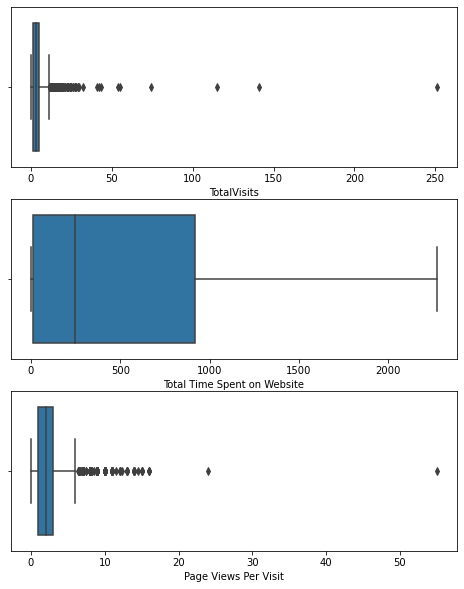

In [33]:
# Visualizing TotalVisits, Total Time Spent on Website, Page Views Per Visit using boxplot 

plt.figure(figsize=[8,10])
plt.subplot(3,1,1)
sns.boxplot(df_leads['TotalVisits'])

plt.subplot(3,1,2)
sns.boxplot(df_leads['Total Time Spent on Website'])

plt.subplot(3,1,3)
sns.boxplot(df_leads['Page Views Per Visit'])
plt.show()

Assuming that a customer visiting the page more than 30 times is a rare scenario, lets drop the values >30 in TotalVisits

In [34]:
df_leads = df_leads[~(df_leads['TotalVisits']>30)]

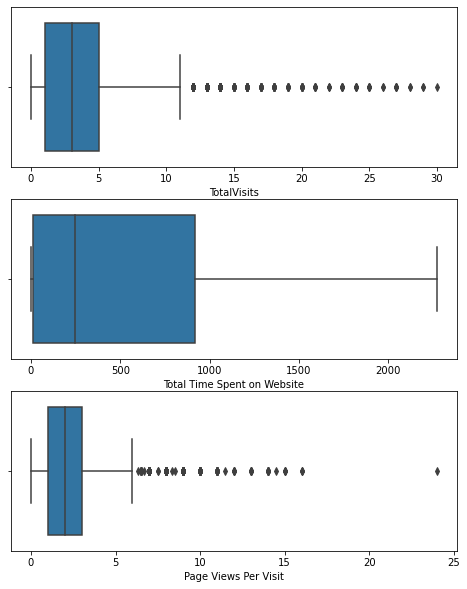

In [35]:
# Again checking for outliers

plt.figure(figsize=[8,10])
plt.subplot(3,1,1)
sns.boxplot(df_leads['TotalVisits'])

plt.subplot(3,1,2)
sns.boxplot(df_leads['Total Time Spent on Website'])

plt.subplot(3,1,3)
sns.boxplot(df_leads['Page Views Per Visit'])
plt.show()

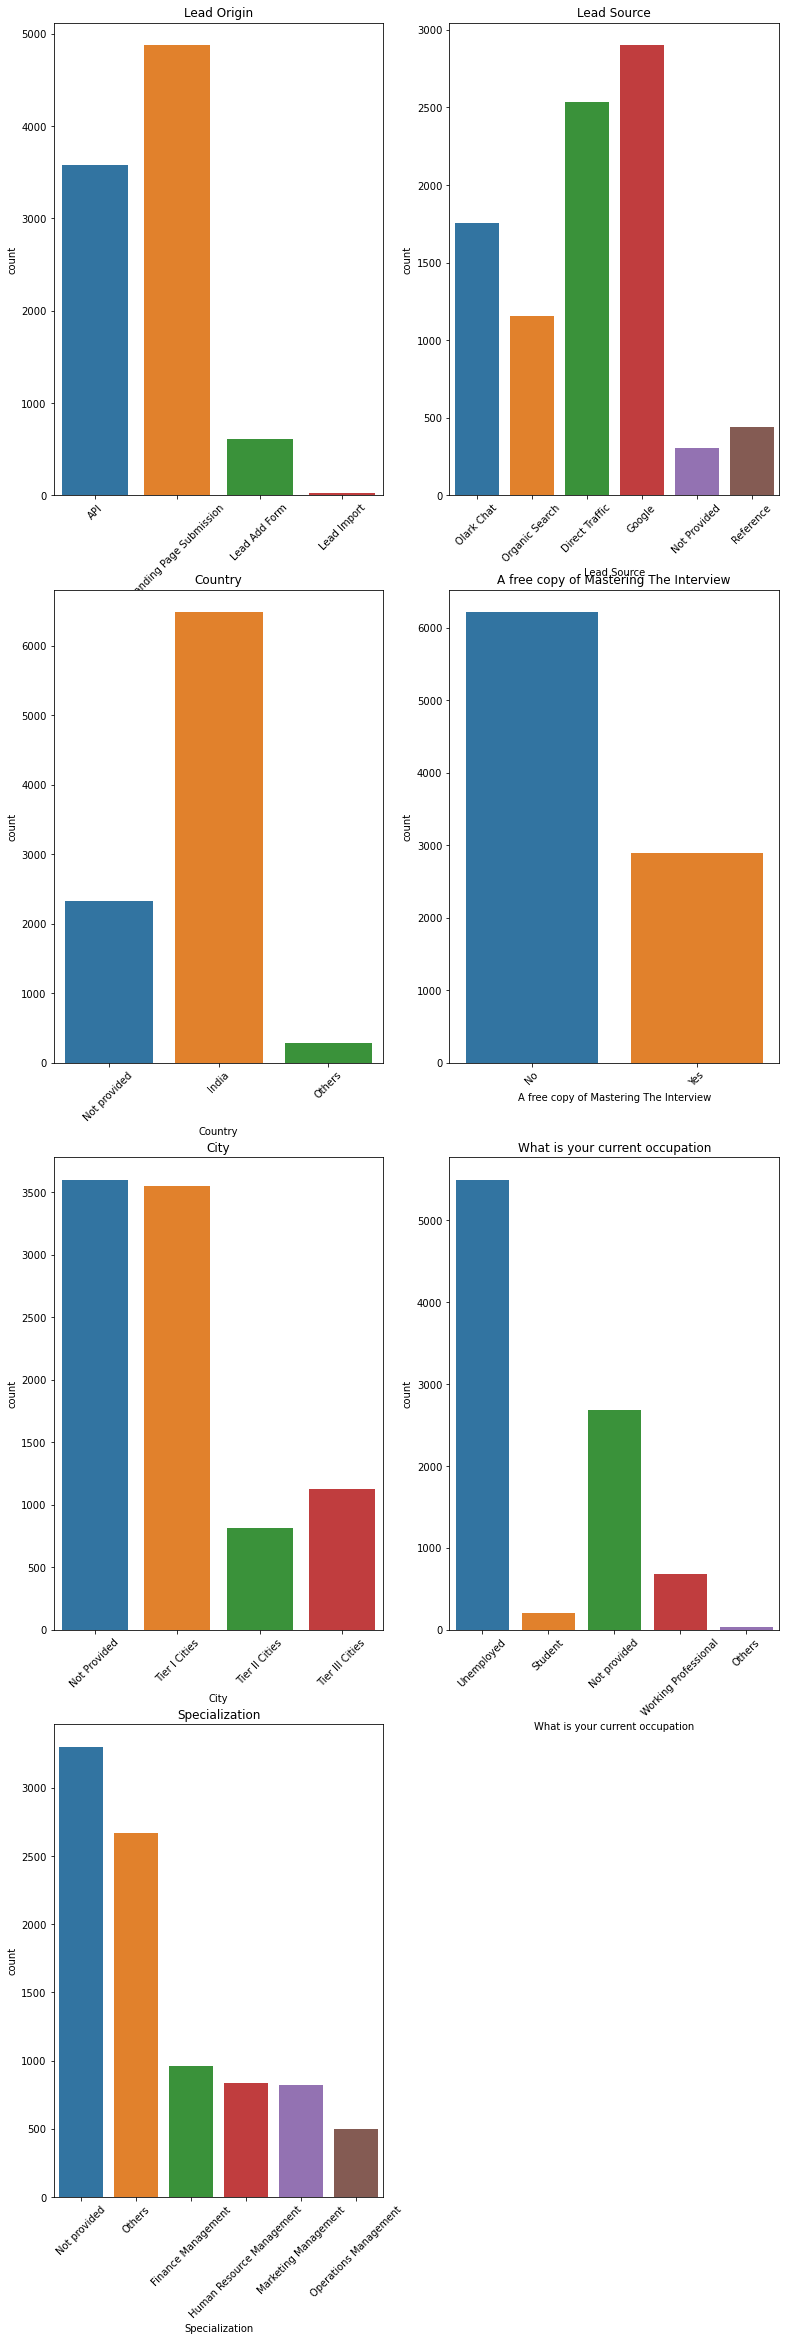

In [36]:
# Univariate Analysis of Categorical variables
cat = ['Lead Origin','Lead Source','Country','A free copy of Mastering The Interview','City','What is your current occupation','Specialization']
x = 1
plt.figure(figsize=(13,40))
for i in cat:
    plt.subplot(4,2,x)
    sns.countplot(df_leads[i])
    plt.xticks(rotation=45)
    plt.title(i)
    x = x+1

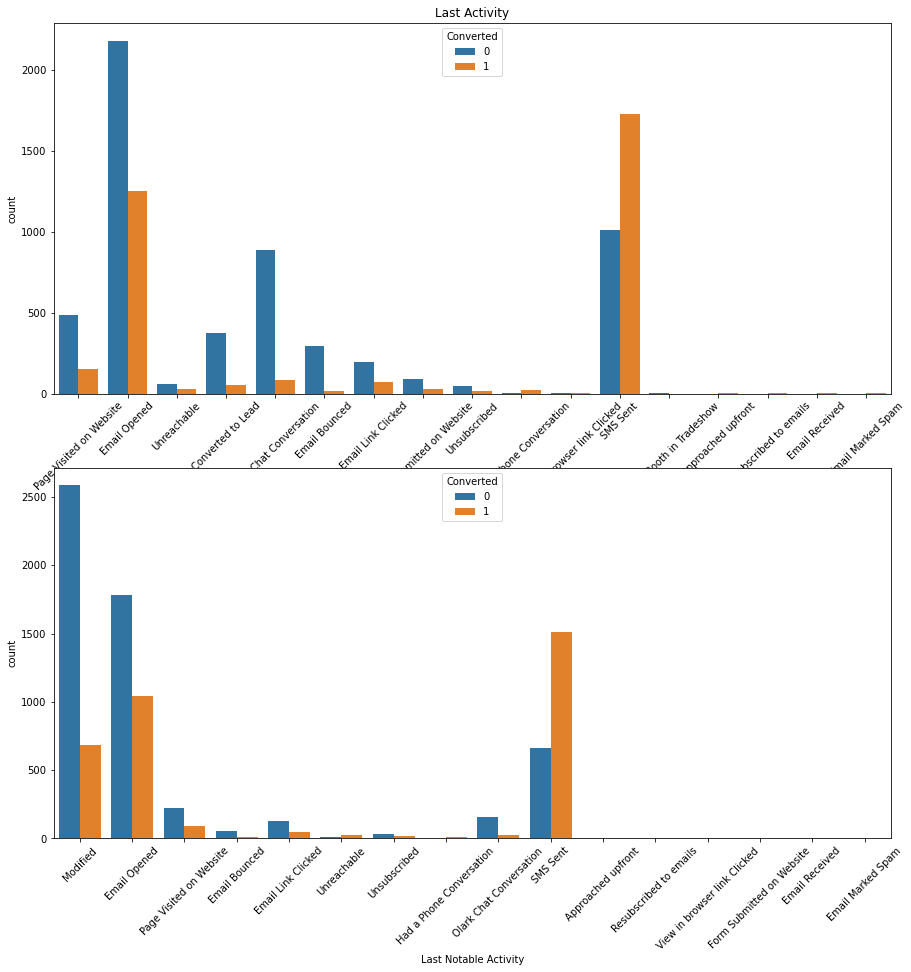

In [37]:
# Visualizing Last Activity & Last Notable Activity wrt Converted
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
sns.countplot(df_leads['Last Activity'],hue=df_leads['Converted'])
plt.xticks(rotation=45)
plt.title('Last Activity')

plt.subplot(2,1,2)
sns.countplot(df_leads['Last Notable Activity'],hue=df_leads['Converted'])
plt.xticks(rotation=45)
plt.show()

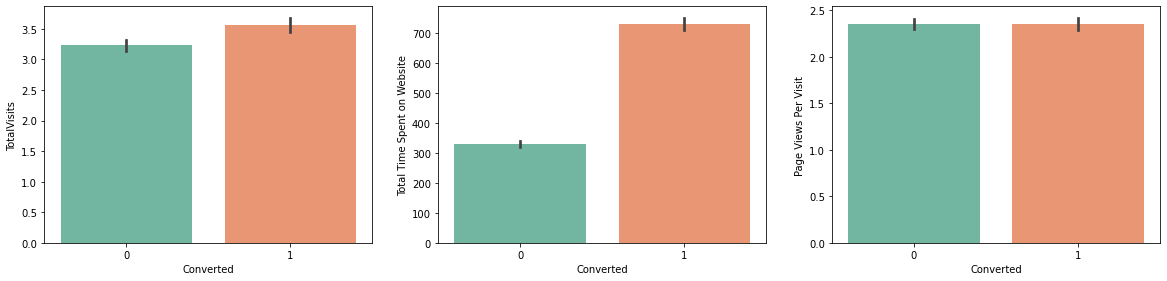

In [38]:
# Visualizing Numerical variables wrt Converted

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = df_leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = df_leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = df_leads)
plt.show()

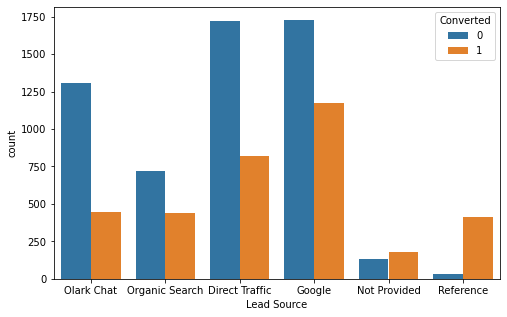

In [39]:
# Multivariate Analysis
# Visualizing Lead source wrt converted

plt.figure(figsize=(8,5))
sns.countplot(x='Lead Source',hue='Converted',data=df_leads)
plt.show()

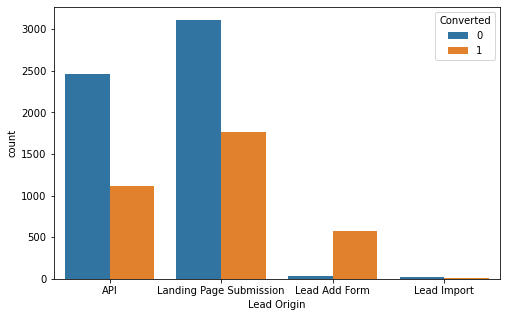

In [40]:
# Visualizing Lead origi wrt converted

plt.figure(figsize=(8,5))
sns.countplot(x='Lead Origin',hue='Converted',data=df_leads)
plt.show()

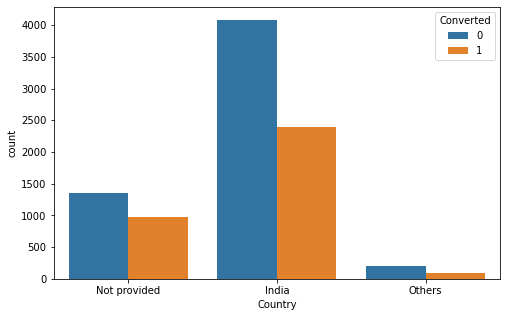

In [41]:
# Visualizing Country wrt converted

plt.figure(figsize=(8,5))
sns.countplot(x='Country',hue='Converted',data=df_leads)
plt.show()

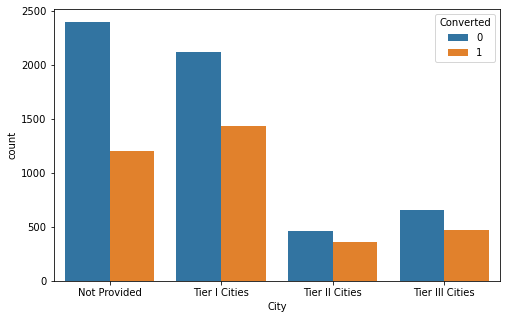

In [42]:
# Visualizing City wrt converted

plt.figure(figsize=(8,5))
sns.countplot(x='City',hue='Converted',data=df_leads)
plt.show()

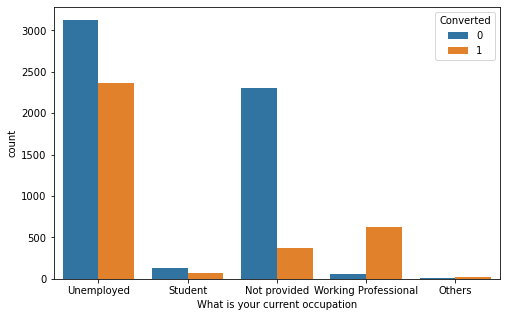

In [43]:
# Visualizing What is your current occupation wrt converted

plt.figure(figsize=(8,5))
sns.countplot(x='What is your current occupation',hue='Converted',data=df_leads)
plt.show()

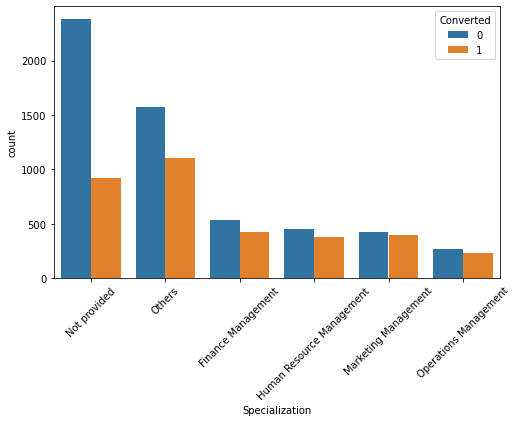

In [44]:
# Visualizing Specialization wrt converted

plt.figure(figsize=(8,5))
sns.countplot(x='Specialization',hue='Converted',data=df_leads)
plt.xticks(rotation=45)
plt.show()

<Figure size 720x720 with 0 Axes>

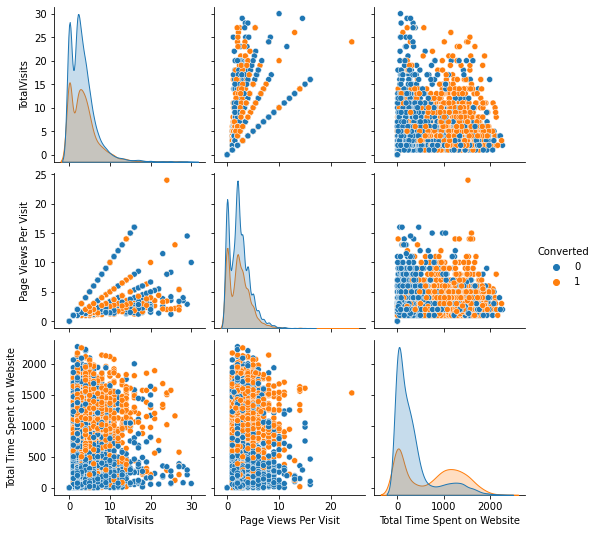

In [45]:
# Checking for correlation between Numerical variables

Var = df_leads[['TotalVisits','Page Views Per Visit','Total Time Spent on Website','Converted']]

plt.figure(figsize=(10,10))
sns.pairplot(Var,hue='Converted',diag_kind='kde')
plt.show()

# Data Preparation

#### Creating dummies for categorical variables

In [46]:
# Creating dummies for all Categorical variables

cols = ['Lead Origin', 'Lead Source', 'Last Activity','Country', 'Specialization', 'What is your current occupation', 'City','A free copy of Mastering The Interview', 'Last Notable Activity']
new_df = pd.get_dummies(df_leads[cols],prefix=cols,drop_first=True)

In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9093 entries, 0 to 9239
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Lead Origin_Landing Page Submission                   9093 non-null   uint8
 1   Lead Origin_Lead Add Form                             9093 non-null   uint8
 2   Lead Origin_Lead Import                               9093 non-null   uint8
 3   Lead Source_Google                                    9093 non-null   uint8
 4   Lead Source_Not Provided                              9093 non-null   uint8
 5   Lead Source_Olark Chat                                9093 non-null   uint8
 6   Lead Source_Organic Search                            9093 non-null   uint8
 7   Lead Source_Reference                                 9093 non-null   uint8
 8   Last Activity_Converted to Lead                       9093 non-null   uint8
 9

In [48]:
df_leads = pd.concat([df_leads,new_df],axis=1)
df_leads.drop(cols,axis=1,inplace=True)

In [49]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9093 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9093 non-null   int64  
 1   TotalVisits                                           9093 non-null   float64
 2   Total Time Spent on Website                           9093 non-null   int64  
 3   Page Views Per Visit                                  9093 non-null   float64
 4   Lead Origin_Landing Page Submission                   9093 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9093 non-null   uint8  
 6   Lead Origin_Lead Import                               9093 non-null   uint8  
 7   Lead Source_Google                                    9093 non-null   uint8  
 8   Lead Source_Not Provided                              9093

#### Splitting the Train - Test data

In [50]:
# Splitting the data into Train - Test data sets

from sklearn.model_selection import train_test_split

df_leads_train, df_leads_test = train_test_split(df_leads, train_size=0.7,test_size=0.3, random_state=100)

In [51]:
df_leads_train.shape

(6365, 58)

In [52]:
df_leads_test.shape

(2728, 58)

#### Scaling of Train data

In [53]:
from sklearn.preprocessing import MinMaxScaler

num_col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

scaler = MinMaxScaler()
df_leads_train[num_col] = scaler.fit_transform(df_leads_train[num_col])
df_leads_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Not Provided,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9044,1,0.233333,0.670775,0.08750,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3022,1,0.000000,0.000000,0.00000,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6232,0,0.166667,0.207746,0.31250,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,1,0.166667,0.115757,0.15625,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3833,0,0.133333,0.131162,0.25000,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
df_leads_train.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Not Provided,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,...,6365.0,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.000000,6365.0
mean,0.384446,0.112459,0.211992,0.146457,0.533386,0.068500,0.003928,0.320817,0.033778,0.192616,...,0.0,0.001728,0.356167,0.019953,0.033778,0.000157,0.242105,0.004242,0.005027,0.0
std,0.486502,0.116696,0.240725,0.130522,0.498923,0.252621,0.062553,0.466827,0.180673,0.394385,...,0.0,0.041539,0.478903,0.139849,0.180673,0.012534,0.428391,0.064997,0.070732,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.033333,0.002641,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.100000,0.106954,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,0.166667,0.402729,0.187500,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


All the values in numerical columns have been scaled between 0 to 1

# Data Modeling

#### Creating X and y data sets

In [55]:
y_train = df_leads_train.pop('Converted')
X_train = df_leads_train

In [56]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Not Provided,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9044,0.233333,0.670775,0.08750,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3022,0.000000,0.000000,0.00000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6232,0.166667,0.207746,0.31250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,0.166667,0.115757,0.15625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3833,0.133333,0.131162,0.25000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
y_train.head()

9044    1
3022    1
6232    0
309     1
3833    0
Name: Converted, dtype: int64

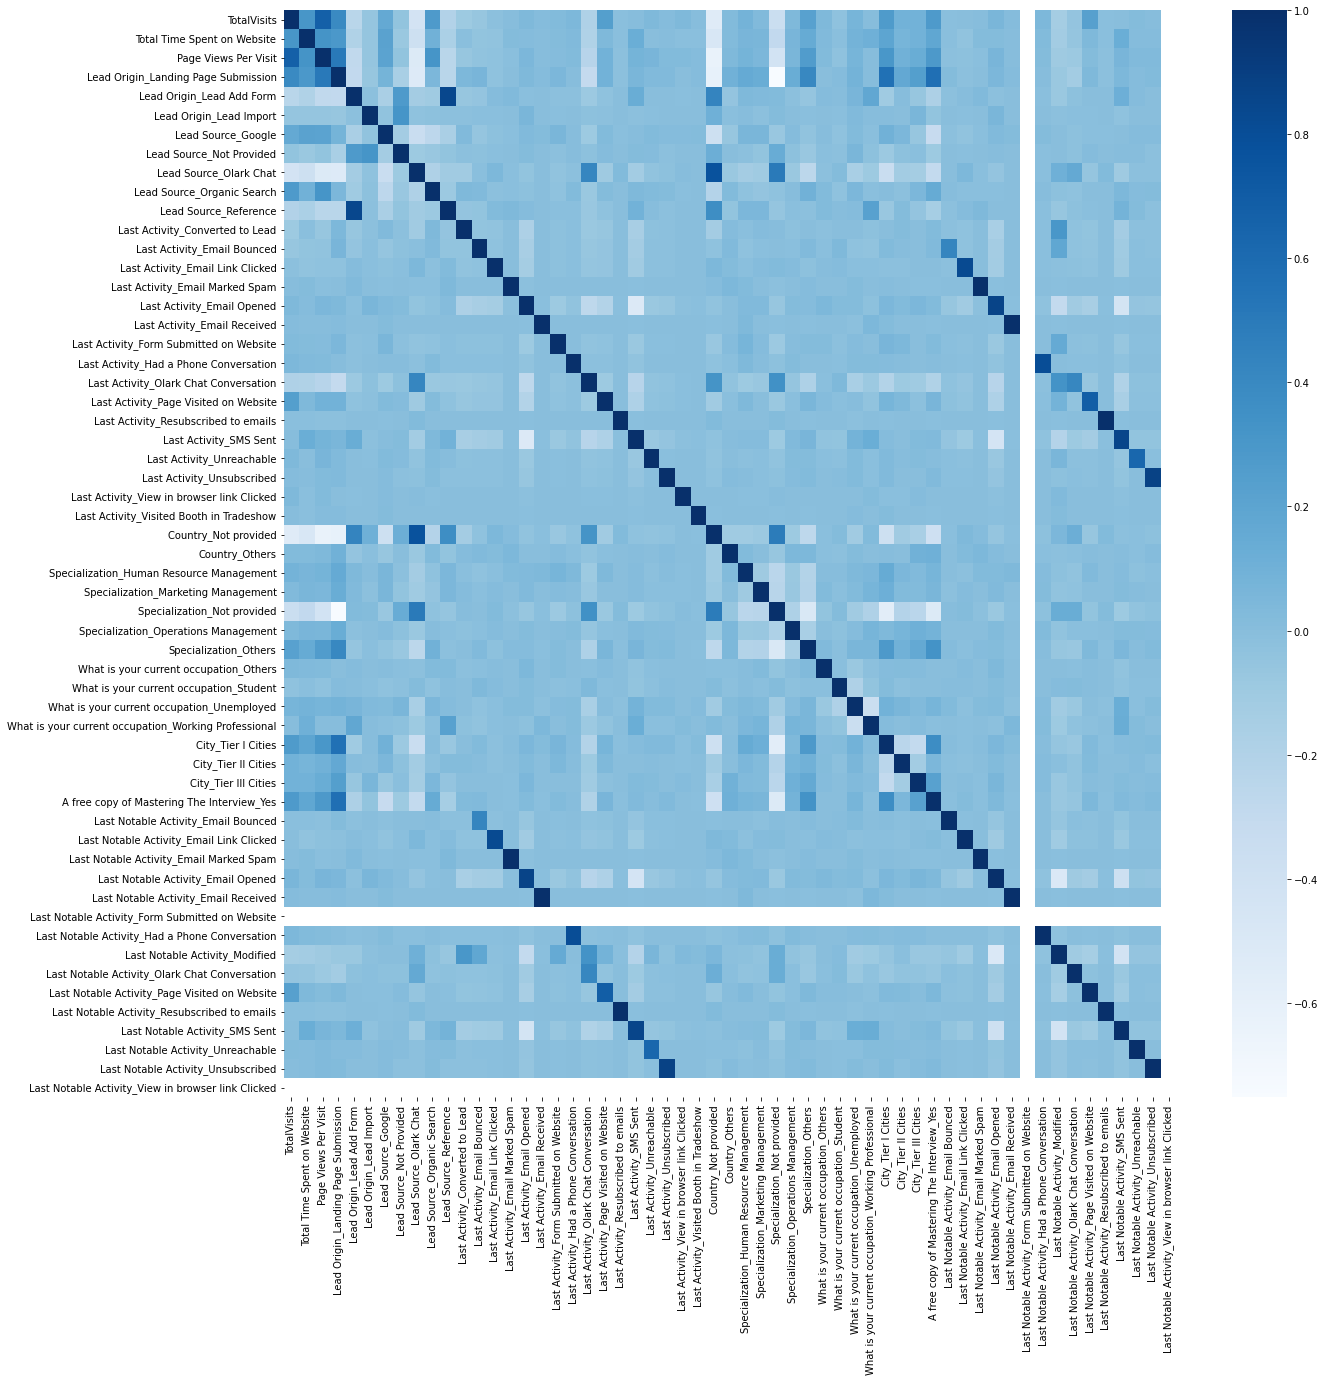

In [58]:
# Checking the variables for correlation
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),cmap='Blues')
plt.show()

As we can see there a couple columns highly correlated. Droping such columns to prevent multicollinearity.

In [59]:
drop_cols = ['Last Notable Activity_Email Received','Last Notable Activity_Email Marked Spam','Last Notable Activity_View in browser link Clicked','Last Notable Activity_Resubscribed to emails','Last Notable Activity_Email Opened','Last Notable Activity_Form Submitted on Website','Country_Not provided','Specialization_Not provided','Last Notable Activity_View in browser link Clicked']

X_train.drop(drop_cols,axis=1,inplace=True)

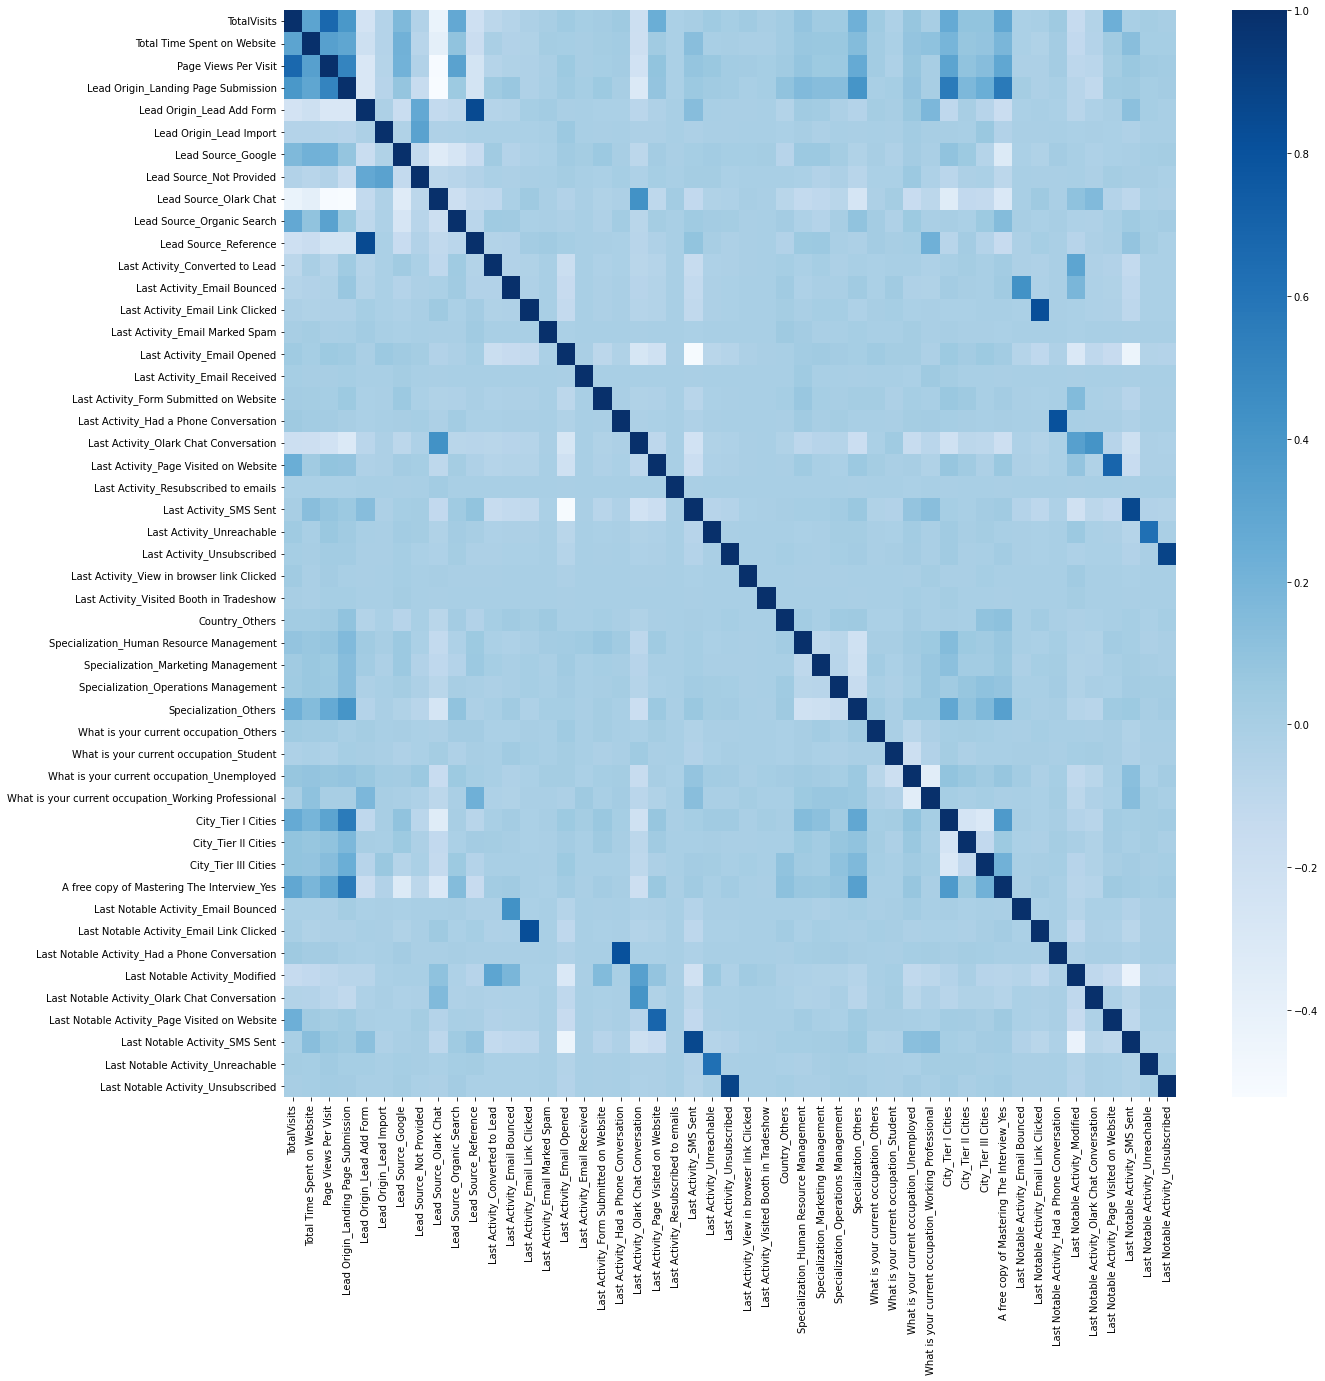

In [60]:
# Checking the variables for correlation
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),cmap='Blues')
plt.show()

#### We will be using RFE and statsmodel method combined for building the final model

In [61]:
# importing necesary libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature seelction using RFE 

LogReg = LogisticRegression()
rfe = RFE(LogReg,15)
rfe = rfe.fit(X_train,y_train)

In [62]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Not Provided', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Reference', False, 17),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 20),
 ('Last Activity_Email Marked Spam', False, 11),
 ('Last Activity_Email Opened', False, 9),
 ('Last Activity_Email Received', False, 31),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Had a Phone Conversation', False, 7),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 16),
 ('Last Activity_Resubscribed to emails', False, 2),
 ('Last Ac

In [63]:
column = X_train.columns[rfe.support_]

In [64]:
column

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [65]:
# Using Statsmodels detailed statistics
# importing necessary statsmodels library
import statsmodels.api as sm

#### Model 1

In [66]:
X_train_rfe = X_train[column]

In [67]:
X_train_sm = sm.add_constant(X_train_rfe)
lrm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res1 = lrm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6365
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.3
Date:                Sun, 17 Jul 2022   Deviance:                       5182.5
Time:                        18:17:13   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.1765      0.126    -25.255      0.000      -3.423      -2.930
TotalVisits                                              1.7631      0.374      4.712      0.000       1.030       2.497
Total Time Spent on Website                              4.5524      0.168     27.146      0.000       4.224       4.881
Page Views Per Visit                                    -1.4418      0.390     -3.696      0.000      -2.206      -0.677
Lead Origin_Lead Add Form                                3.9949      0.224     17.809      0.000       3.555       4.435
Lead Source_Olark Chat                                   1.2943      0.125     10.320      0.000       1.049       1.540
Last Activity_Converted to Lead                         -1.1905      0.215     -5.550      0.000      -1.611      -0.770
Last Activity_Email Bounced                             -2.0600      0.334     -6.162      0.000      -2.715      -1.405
Last Activity_Olark Chat Conversation                   -1.4775      0.169     -8.754      0.000      -1.808      -1.147
What is your current occupation_Others                   2.8866      0.573      5.041      0.000       1.764       4.009
What is your current occupation_Student                  1.3118      0.235      5.575      0.000       0.851       1.773
What is your current occupation_Unemployed               1.1038      0.088     12.505      0.000       0.931       1.277
What is your current occupation_Working Professional     3.6388      0.201     18.091      0.000       3.245       4.033
Last Notable Activity_Had a Phone Conversation           3.3522      1.131      2.964      0.003       1.135       5.569
Last Notable Activity_SMS Sent                           1.4093      0.080     17.548      0.000       1.252       1.567
Last Notable Activity_Unreachable                        1.6646      0.494      3.372      0.001       0.697       2.632
========================================================================================================================
"""

In [68]:
# Importing Varaiance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking VIF values

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,4.22
0,TotalVisits,3.60
10,What is your current occupation_Unemployed,2.68
1,Total Time Spent on Website,2.13
4,Lead Source_Olark Chat,1.56
13,Last Notable Activity_SMS Sent,1.49
7,Last Activity_Olark Chat Conversation,1.39
11,What is your current occupation_Working Profes...,1.35
3,Lead Origin_Lead Add Form,1.31
5,Last Activity_Converted to Lead,1.06


### Model 2

In [69]:
# Removing the varaible 'Page Views Per Visit' because of high VIF value ----VIF value <4 considered good enough
X_train_rfe.drop(['Page Views Per Visit'],axis=1,inplace=True)

In [70]:
# Re-building the model after dropping 'Page Views Per Visit'
X_train_sm = sm.add_constant(X_train_rfe)
lrm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res2 = lrm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6365
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.2
Date:                Sun, 17 Jul 2022   Deviance:                       5196.4
Time:                        18:17:13   Pearson chi2:                 6.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3555      0.117    -28.664      0.000      -3.585      -3.126
TotalVisits                                              1.1152      0.333      3.354      0.001       0.463       1.767
Total Time Spent on Website                              4.5448      0.167     27.133      0.000       4.217       4.873
Lead Origin_Lead Add Form                                4.1770      0.219     19.067      0.000       3.748       4.606
Lead Source_Olark Chat                                   1.4727      0.116     12.648      0.000       1.244       1.701
Last Activity_Converted to Lead                         -1.1308      0.214     -5.281      0.000      -1.551      -0.711
Last Activity_Email Bounced                             -2.0182      0.333     -6.061      0.000      -2.671      -1.366
Last Activity_Olark Chat Conversation                   -1.4674      0.169     -8.705      0.000      -1.798      -1.137
What is your current occupation_Others                   2.8814      0.572      5.033      0.000       1.759       4.003
What is your current occupation_Student                  1.3101      0.235      5.564      0.000       0.849       1.772
What is your current occupation_Unemployed               1.1035      0.088     12.526      0.000       0.931       1.276
What is your current occupation_Working Professional     3.6230      0.201     18.043      0.000       3.229       4.017
Last Notable Activity_Had a Phone Conversation           3.3499      1.129      2.968      0.003       1.138       5.562
Last Notable Activity_SMS Sent                           1.3846      0.080     17.343      0.000       1.228       1.541
Last Notable Activity_Unreachable                        1.6213      0.494      3.279      0.001       0.652       2.590
========================================================================================================================
"""

In [71]:
# Checking VIF values

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.51
1,Total Time Spent on Website,2.08
0,TotalVisits,2.03
3,Lead Source_Olark Chat,1.53
12,Last Notable Activity_SMS Sent,1.47
6,Last Activity_Olark Chat Conversation,1.39
10,What is your current occupation_Working Profes...,1.33
2,Lead Origin_Lead Add Form,1.28
4,Last Activity_Converted to Lead,1.06
8,What is your current occupation_Student,1.05


In [72]:
column = X_train_rfe.columns

All the p-values & VIF values look good. lets assess the model with these variables

In [73]:
# Assesing the Model

y_train_pred = res2.predict(X_train_sm)
y_train_pred[:10]

9044    0.742068
3022    0.964755
6232    0.245645
309     0.176528
3833    0.469382
1050    0.500180
5239    0.314466
4708    0.986283
6927    0.386072
8596    0.957074
dtype: float64

In [74]:
#Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.74206778, 0.96475452, 0.24564537, 0.17652847, 0.46938238,
       0.50017962, 0.3144659 , 0.98628269, 0.38607249, 0.95707391])

In [75]:
y_train_pred_final = pd.DataFrame({'Hot_Lead':y_train.values, 'Hot_Lead_Prob': y_train_pred})
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob
0,1,0.742068
1,1,0.964755
2,0,0.245645
3,1,0.176528
4,0,0.469382


In [76]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted_0.5'] = y_train_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Predicted_0.5
0,1,0.742068,1
1,1,0.964755,1
2,0,0.245645,0
3,1,0.176528,0
4,0,0.469382,0


In [77]:
# Model Evaluation

# importing necessary librarie
from sklearn import metrics


In [78]:
# Creting confussion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Hot_Lead, y_train_pred_final['Predicted_0.5'])
confusion

array([[3481,  437],
       [ 724, 1723]], dtype=int64)

In [79]:
# Predicted     not_churn    churn
# Actual
# not_churn        3463       455
# churn             732      1715

In [80]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Hot_Lead, y_train_pred_final['Predicted_0.5'])

0.8175962293794187

The accuracy is ~81% which is a good value.

In [81]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [82]:
# Calculating the sensitivity
TP/(TP+FN)

0.7041275030649775

In [83]:
# Calculating the specificity
TN/(TN+FP)

0.8884635017866258

### Optimise Cut off (ROC)

In [84]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [85]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Hot_Lead, y_train_pred_final.Hot_Lead_Prob, drop_intermediate = False )

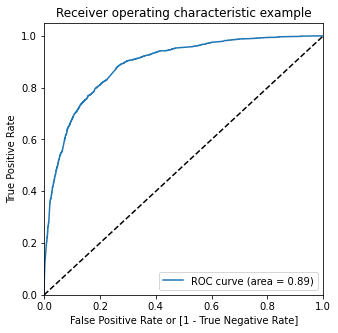

In [86]:
# Call the ROC function
draw_roc(y_train_pred_final.Hot_Lead, y_train_pred_final.Hot_Lead_Prob)


The area under ROC curve is 0.89, which is a good value

In [87]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.742068,1,1,1,1,1,1,1,1,1,0,0
1,1,0.964755,1,1,1,1,1,1,1,1,1,1,1
2,0,0.245645,0,1,1,1,0,0,0,0,0,0,0
3,1,0.176528,0,1,1,0,0,0,0,0,0,0,0
4,0,0.469382,0,1,1,1,1,1,0,0,0,0,0


In [88]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Hot_Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.384446,1.000000,0.000000
0.1,0.1,0.617596,0.975889,0.393823
0.2,0.2,0.760880,0.912955,0.665901
0.3,0.3,0.793244,0.877401,0.740684
0.4,0.4,0.811469,0.773192,0.835375
0.5,0.5,0.817596,0.704128,0.888464
0.6,0.6,0.809741,0.636289,0.918070
0.7,0.7,0.782090,0.514508,0.949209
0.8,0.8,0.759780,0.427871,0.967075
0.9,0.9,0.702907,0.247650,0.987238


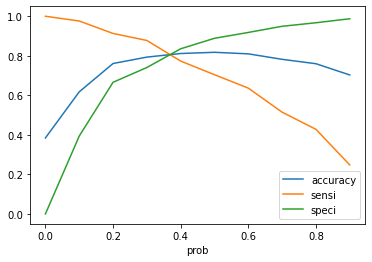

In [89]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph we can see that the optimal cutoff is around 0.35

In [90]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Hot_Lead_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.742068,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.964755,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.245645,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.176528,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.469382,0,1,1,1,1,1,0,0,0,0,0,1


#### Creating lead Score

Creating a column called Lead Score by multplying the converted probablity with 100.

In [91]:
# Creating Lead Score column
y_train_pred_final['Lead Score'] = round((y_train_pred_final['Hot_Lead_Prob']*100))
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,1,0.742068,1,1,1,1,1,1,1,1,1,0,0,1,74.0
1,1,0.964755,1,1,1,1,1,1,1,1,1,1,1,1,96.0
2,0,0.245645,0,1,1,1,0,0,0,0,0,0,0,0,25.0
3,1,0.176528,0,1,1,0,0,0,0,0,0,0,0,0,18.0
4,0,0.469382,0,1,1,1,1,1,0,0,0,0,0,1,47.0


- The customers with Lead Score more than 35 will be converted as we decided to have the optimal probablity cutoff is 0.35
- Higher the Lead Score, higher the chance of the customers to be converted.

###### Finding the average Lead Score of the predicted converted leads

In [92]:
# Creating dataframe for predicted converted leads
y_train_pred_converted = y_train_pred_final[y_train_pred_final['final_predicted']==1]
y_train_pred_converted.head()

,Hot_Lead,Hot_Lead_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,1,0.742068,1,1,1,1,1,1,1,1,1,0,0,1,74.0
1,1,0.964755,1,1,1,1,1,1,1,1,1,1,1,1,96.0
4,0,0.469382,0,1,1,1,1,1,0,0,0,0,0,1,47.0
5,1,0.500180,1,1,1,1,1,1,1,0,0,0,0,1,50.0
7,1,0.986283,1,1,1,1,1,1,1,1,1,1,1,1,99.0


In [93]:
# Average Lead Score of the predicted converted leads
avg_converted = round(sum(y_train_pred_converted['Lead Score'])/len(y_train_pred_converted.index))
avg_converted

71

We can see that the average Lead Score of the customers, who were converted is 68.

##### Finding the average Lead Score of the predicted not converted leads

In [94]:
# Creating dataframe for predicted not converted leads
y_train_pred_not_converted = y_train_pred_final[y_train_pred_final['final_predicted']==0]
y_train_pred_not_converted.head()

,Hot_Lead,Hot_Lead_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
2,0,0.245645,0,1,1,1,0,0,0,0,0,0,0,0,25.0
3,1,0.176528,0,1,1,0,0,0,0,0,0,0,0,0,18.0
6,0,0.314466,0,1,1,1,1,0,0,0,0,0,0,0,31.0
10,0,0.140003,0,1,1,0,0,0,0,0,0,0,0,0,14.0
11,1,0.049216,0,1,0,0,0,0,0,0,0,0,0,0,5.0


In [95]:
# Average Lead Score of the predicted not converted leads
avg_not_converted = round(sum(y_train_pred_not_converted['Lead Score'])/len(y_train_pred_not_converted.index))
avg_not_converted

13

We can see that the average Lead Score of the customers, who were not converted is 15

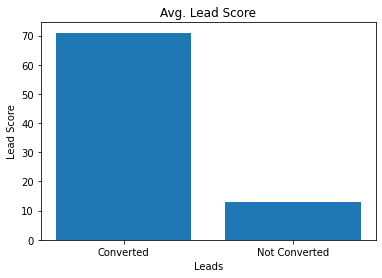

In [96]:
# Bar plot
plt.bar(['Converted', 'Not Converted'], [avg_converted, avg_not_converted])
plt.xlabel('Leads')
plt.ylabel('Lead Score')
plt.title('Avg. Lead Score')
plt.show()

In [97]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Hot_Lead, y_train_pred_final.final_predicted)

0.8036135113904164

In [98]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Hot_Lead, y_train_pred_final.final_predicted )
confusion2

array([[3117,  801],
       [ 449, 1998]], dtype=int64)

In [99]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [100]:
# Calculating the sensitivity
TP/(TP+FN)

0.81651001225991

In [101]:
# Calculating the specificity
TN/(TN+FP)

0.7955589586523737

##### With cutoff of 0.35 the Accuracy is ~80%, Sensitivity is ~82% & Specificity is ~80% for train data set

# Prediction on Test data set

In [102]:
# Scaling Numeric variables

df_leads_test[num_col] = scaler.transform(df_leads_test[num_col])

In [103]:
df_leads_test.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Not Provided,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,...,2728.000000,2728.00000,2728.000000,2728.000000,2728.000000,2728.0,2728.000000,2728.000000,2728.000000,2728.000000
mean,0.371334,0.110459,0.211476,0.148797,0.543255,0.063050,0.002199,0.314883,0.033358,0.193182,...,0.000367,0.00110,0.366935,0.020528,0.035924,0.0,0.230938,0.001833,0.005499,0.000367
std,0.483250,0.107449,0.238110,0.130171,0.498217,0.243097,0.046855,0.464554,0.179602,0.394867,...,0.019146,0.03315,0.482057,0.141823,0.186134,0.0,0.421510,0.042780,0.073962,0.019146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033333,0.006162,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.100000,0.108495,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.166667,0.408891,0.203125,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.800000,0.955106,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [104]:
y_test = df_leads_test.pop('Converted')

In [105]:
# Select the columns in X_train for X_test as well
X_test = df_leads_test[column]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm


,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
6297,1.0,0.300000,0.454665,0,0,0,0,0,0,0,1,0,0,1,0
8181,1.0,0.000000,0.000000,1,0,0,0,0,0,0,1,0,0,1,0
7000,1.0,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0,0,0
8052,1.0,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,1,0
2917,1.0,0.000000,0.000000,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7397,1.0,0.100000,0.163732,0,0,0,0,0,0,0,1,0,0,0,0
7956,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0
8002,1.0,0.266667,0.152289,0,0,0,0,0,0,0,1,0,0,1,0
1963,1.0,0.066667,0.115317,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
6297,0.3,0.454665,0,0,0,0,0,0,0,1,0,0,1,0
8181,0.0,0.000000,1,0,0,0,0,0,0,1,0,0,1,0
7000,0.0,0.000000,0,1,0,0,1,0,0,0,0,0,0,0
8052,0.0,0.000000,1,0,0,0,0,0,0,0,1,0,1,0
2917,0.0,0.000000,0,1,0,0,0,0,0,1,0,0,0,0


In [107]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res2.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Hot_Lead_Prob'})
y_pred_final.head()

,Converted,Hot_Lead_Prob
0,1,0.822519
1,0,0.964755
2,0,0.033889
3,1,0.997068
4,0,0.314466


In [108]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Hot_Lead_Prob,final_predicted
0,1,0.822519,1
1,0,0.964755,1
2,0,0.033889,0
3,1,0.997068,1
4,0,0.314466,0
...,...,...,...
2723,0,0.198395,0
2724,0,0.132071,0
2725,1,0.530485,1
2726,0,0.059691,0


In [109]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8035190615835777

In [110]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1374,  341],
       [ 195,  818]], dtype=int64)

In [111]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [112]:
# Calculating the sensitivity
TP/(TP+FN)

0.807502467917078

In [113]:
# Calculating the specificity
TN/(TN+FP)

0.8011661807580175

##### With cutoff 0.35 Accuracy is ~80%, Sensitivity is ~81% and Specificity is ~80% for test data set, which are pretty close to train data

### Precission & Recall tradeoff on train data

In [114]:
from sklearn.metrics import precision_recall_curve

In [115]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Hot_Lead, y_train_pred_final.Hot_Lead_Prob)

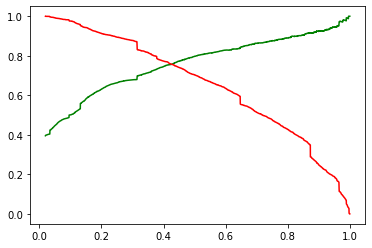

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Cutoff is around 0.41

In [117]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Hot_Lead,Hot_Lead_Prob,Predicted_0.5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,1,0.742068,1,1,1,1,1,1,1,1,1,0,0,1,74.0
1,1,0.964755,1,1,1,1,1,1,1,1,1,1,1,1,96.0
2,0,0.245645,0,1,1,1,0,0,0,0,0,0,0,0,25.0
3,1,0.176528,0,1,1,0,0,0,0,0,0,0,0,0,18.0
4,0,0.469382,0,1,1,1,1,1,0,0,0,0,0,1,47.0


In [118]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Hot_Lead, y_train_pred_final.final_predicted)

0.8138256087981147

In [119]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Hot_Lead, y_train_pred_final.final_predicted )
confusion2

array([[3296,  622],
       [ 563, 1884]], dtype=int64)

In [120]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [121]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7517956903431764

In [122]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.769922353902738

##### With the current cut off as 0.41 we have Precision of ~75% and Recall of ~77% for train data set

### Prediction on Test data set

In [123]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res2.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Hot_Lead_Prob'})
y_pred_final.head()

,Converted,Hot_Lead_Prob
0,1,0.822519
1,0,0.964755
2,0,0.033889
3,1,0.997068
4,0,0.314466


In [124]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Hot_Lead_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Hot_Lead_Prob,final_predicted
0,1,0.822519,1
1,0,0.964755,1
2,0,0.033889,0
3,1,0.997068,1
4,0,0.314466,0
...,...,...,...
2723,0,0.198395,0
2724,0,0.132071,0
2725,1,0.530485,1
2726,0,0.059691,0


In [125]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8086510263929618

In [126]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1438,  277],
       [ 245,  768]], dtype=int64)

In [127]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [128]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7349282296650718

In [129]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7581441263573544

##### With cutoff of 0.41 we have Precission of ~74% and Recall 0f ~76% for the test data set, which are pretty close to the values of train data.

### Conclusion

It was found that the variables that mattered the most in the potential buyers are:

1. Total number of visits.
2. The total time spend on the Website
4. When the Last Notable Activity was:
    - SMS_Sent
    - Had a Phone Conversation
    - Unreachable
5. When the lead source was:
    - Olark Chat
6. When lead origin was:
    - Lead Add Form
7. When the last activity was:
    - Olark chat conversation
    - Converted to Lead
    - Email Bounced
8. What is their current occupation is as a Unemployed, Working professional, Student & other.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.